### **Problem Statement**

- Build a Binary Classifier ANN Model that will predict wheter a person has diabetes or not 


In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [6]:
# Imbalanced Datset

df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df['Pregnancies'].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
17      1
15      1
Name: count, dtype: int64

In [10]:
df['Insulin'].value_counts()

Insulin
0      374
105     11
130      9
140      9
120      8
      ... 
178      1
127      1
510      1
16       1
112      1
Name: count, Length: 186, dtype: int64

In [11]:
df = df[df['Pregnancies'] <= 13]

In [14]:
df['Pregnancies'].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
Name: count, dtype: int64

In [15]:
df.shape

(764, 9)

### Scaling

In [16]:
X =df.drop('Outcome',axis=1) 

In [17]:
y = df['Outcome']

In [18]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,train_size=0.9,random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [20]:
X_train_scaled

array([[-0.55379389, -0.16984163, -0.27537164, ..., -0.14324792,
        -0.1463083 , -1.03882489],
       [-0.55379389, -1.6365483 , -0.38249526, ..., -1.51398617,
        -0.64469874, -0.8685176 ],
       [-1.15769293, -0.57552645, -0.91811338, ..., -0.87345428,
        -1.18867368, -1.03882489],
       ...,
       [-0.25184436,  0.04860405,  0.47449372, ..., -1.14247767,
        -0.65381564,  0.57909437],
       [-0.85574341, -0.73155908,  0.04599923, ..., -1.75738829,
        -0.97898502, -1.03882489],
       [-0.85574341, -1.23086347,  0.15312285, ..., -0.68129471,
        -0.56568563, -0.78336396]])

### Model Training

In [39]:
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, input_shape=(X_train.shape[1],),activation='relu'),

  tf.keras.layers.Dense(64, activation='relu'),
  # tf.keras.layers.Dropout(0.2),
  
  tf.keras.layers.Dense(32, activation='relu'),
  # tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Dense(32, activation='relu'),
  

  tf.keras.layers.Dense(1,activation='sigmoid')
])

d:\Make your first ANN\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [41]:
model.fit(X_train,y_train,epochs=35, verbose=True ,class_weight= {0:1 ,1:5})

Epoch 1/35
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4767 - loss: 3.0611
Epoch 2/35
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4394 - loss: 1.4504 
Epoch 3/35
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5018 - loss: 1.2670
Epoch 4/35
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4390 - loss: 1.2711 
Epoch 5/35
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5032 - loss: 1.2282 
Epoch 6/35
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5361 - loss: 1.2173 
Epoch 7/35
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5231 - loss: 1.1763 
Epoch 8/35
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5002 - loss: 1.3110 
Epoch 9/35
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5015 - loss: 1.2559 
Epoch 10/35
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5292 - loss: 1.2325 
Epoch 11/35
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5371 - loss: 1.1770 
Epoch 12/35
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.

In [42]:
import keras_tuner
import keras

In [45]:
def build_model(hp):
  model = keras.Sequential()
  
  model.add(keras.layers.Dense(
      hp.Choice('units', [8, 16, 32,64,128]),
      hp.Choice("activation ", ['relu','sigmoid']))
       )
  
  model.add(keras.layers.Dense(
      hp.Choice('units', [8, 16, 32,64,128]),
      activation=hp.Choice('activation', ['relu', 'sigmoid'])))
  
  model.add(keras.layers.Dense(
      hp.Choice('units', [8, 16, 32,64,128]),
      activation=hp.Choice('activation', ['relu', 'sigmoid'])))
  
  
  model.add(keras.layers.Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy')
  
  return model

In [53]:
tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5)

Reloading Tuner from .\untitled_project\tuner0.json


In [54]:
tuner.search(X_train, y_train, epochs=5, validation_split=0.2)
best_model = tuner.get_best_models()[0]

In [57]:
best_model.summary

<bound method Model.summary of <Sequential name=sequential, built=True>>

In [58]:
best_trial = tuner.oracle.get_best_trials(num_trials=1)[0]


In [59]:
best_hyperparameters = best_trial.hyperparameters.values


In [60]:
print("Best Hyperparameters:")
for key, value in best_hyperparameters.items():
    print(f"{key}: {value}")

# Optionally, get the best model
best_model = tuner.get_best_models()[0]

# Summary of the best model
best_model.summary()

Best Hyperparameters:
units: 128
activation : sigmoid
activation: relu


d:\Make your first ANN\venv\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,305 (134.00 KB)

 Trainable params: 34,305 (134.00 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:

# Now, get the best model
best_model = tuner.get_best_models()[0]

# Inspect the layers of the best model and print out the hyperparameters for each layer
print("\nBest Model's Layer Details:")
for layer in best_model.layers:
    if isinstance(layer, keras.layers.Dense):
        print(f"Layer: {layer.name}")
        print(f"  - Units: {layer.units}")
        print(f"  - Activation: {layer.activation.__name__}")
        # print(f"  - Input shape: {layer.input_shape}")
        # print(f"  - Output shape: {layer.output_shape}")
        print()


Best Model's Layer Details:
Layer: dense
  - Units: 128
  - Activation: sigmoid

Layer: dense_1
  - Units: 128
  - Activation: relu

Layer: dense_2
  - Units: 128
  - Activation: relu

Layer: dense_3
  - Units: 1
  - Activation: sigmoid



In [268]:
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, input_shape=(X_train.shape[1],),activation='sigmoid'),

  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  
  tf.keras.layers.Dense(1,activation='sigmoid')
])

d:\Make your first ANN\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [269]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [270]:
df['Outcome'].value_counts()

Outcome
0    500
1    264
Name: count, dtype: int64

In [271]:
history = model.fit(X_train,y_train,epochs=30, verbose=True, class_weight = {0: 0.764, 1: 1.448}
 )

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5121 - loss: 0.7344
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5562 - loss: 0.7002
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5979 - loss: 0.6790
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5193 - loss: 0.6855
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6039 - loss: 0.6626
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6042 - loss: 0.6723 
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6052 - loss: 0.6527
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6278 - loss: 0.6512
Epoch 9/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5844 - loss: 0.6466
Epoch 10/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6415 - loss: 0.6371 
Epoch 11/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6053 - loss: 0.6278 
Epoch 12/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6573 -

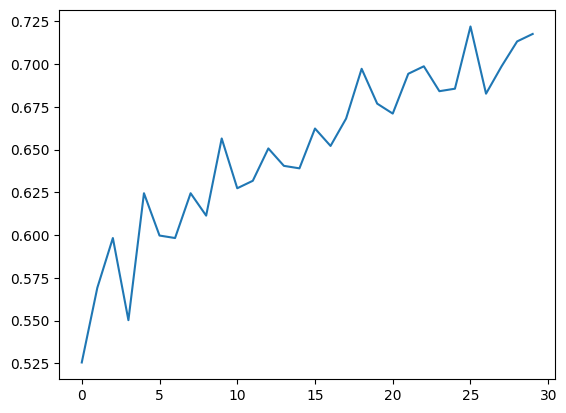

In [272]:

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])

In [273]:
y_pred = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [274]:
y_pred.shape

(77, 1)

In [275]:
y_test.shape

(77,)

In [276]:
y_pred = (y_pred > 0.5).astype(int)


In [277]:
from sklearn.metrics import classification_report

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.76      0.83      0.80        47
           1       0.69      0.60      0.64        30

    accuracy                           0.74        77
   macro avg       0.73      0.71      0.72        77
weighted avg       0.74      0.74      0.74        77



In [278]:
from sklearn.metrics import accuracy_score


accuracy_score(y_pred , y_test)

0.7402597402597403

In [279]:
from sklearn.metrics import recall_score , precision_score
recall_score(y_pred ,y_test)

0.6

In [280]:
precision_score(y_pred ,y_test)

0.6923076923076923

In [282]:

import pickle

# Save the model and the scaler using pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Model and scaler saved.")

Model and scaler saved.
